Introduction

Our project involves investigating optimal trajectories for moving a cart with an attached pendulum. This project is usually a typical control theory problem, but we are using optimization to investigate the effects of various assumption like small angle approximations and removal of 2nd order terms in solving the trajectory of the cart while minimizing the motor effort. The cart with mass ($m_1$) lays on a frictionless track and can be moved horizontally by control force ($u$). A pendulum with a massless rod (length, $l$) and a bob (mass, $m_2$) is attached to the cart using a frictionless bearing. The cart and the bob will be treated as point masses. The force acting on the cart will also cause the pendulum to swing. Three models with varying complexity will be used to observe the effects of assumptions on the physical dynamics on three different trajectory scenarios.  
The three models will increase in complexity due to the decrease in the amount of assumptions:
1. Small angle approximation with quazi-static equations. This model will have a quadratic model with linear constraints.
2. Small angle approximation. This model will have a quadratic model with quadratic constraints.
3. No extra assumptions with full dynamic equations. This model will have a quadratic model with non-linear constraints.

The models will aim to minimize the objective function of control force squared when it solves for the control force to move the cart/pendulum through the three trajectory scernarios. All models will have mass, length, state and state derivative (position, velocity, and acceleration) variables for the cart and pendulum. We will use boundary constraints which will limit the initial and final states and state derivatives of the cart and pendulum.

These trajectory scenarios will be swinging the pendulum through the non-inverted positions (rotation of pendulum to a spefic angle?), translation of cart and pendulum while keeping the pendulum in the inverted position, and swing the pendulum from the non-inverted to inverted position (freedom of cart to translate and pendulum to rotate). To verify the solver's ability to estimate the state of the cart and pendulum, a forward euler numerical integrator will also be used. 


Cartesian coordinates of the cart and pole will be 
\begin{equation}
\begin{bmatrix}
q_1 \\ 0 
\end{bmatrix}
\qquad \text{and} \qquad 
\begin{bmatrix}
q_1 + l \sin(q_2) \\ l \cos(q_2)] 
\end{bmatrix}
\end{equation}
where ($q_1$) is the horizontal position of the cart and ($q_2$) is the angle of the pendulum.

The state, $x$ and state derivative, $\dot{x}$ will give the dynamics of the system in first-order form and represnets the minimal generalized coordinates and its derivatives
\begin{equation}
 x =
 \begin{bmatrix}
  q_1 \\ q_2 \\ \dot{q_1} \\ \dot{q_2}
\end{bmatrix}	
\qquad \text{and} \qquad 		
\dot{x} = f ( x , u ) =
\begin{bmatrix}
\dot{q_1} \\ \dot{q_2} \\ \ddot{q_1} \\ \ddot{q_2}
\end{bmatrix}
\end{equation}

Using Lagrangian method, 	
$ L = T - V $
where T is the kinetic energy and V the potential energy of the system. L summarizes the system dynamics.

\begin{align}
& T = T_{cart} + T_{pole} \\
&T_{cart} = \frac{1}{2} m_1\dot{ q_1}^2 \\
&T_{pole} = \frac{1}{2} m_2  [\dot{(q_1 + l \sin(q_2)}^2 +\dot{(l\cos(q_2)}^2] \\\\
& V = V_{cart} + V_{pole} \\
&V = 0 + m_2 g l \cos(q_2) \\
\end{align}

The potential energy of the cart is zero since it is not moving vertically and it has a height of 0.

Thus $L = \frac{1}{2} m_1 q_1^2 + \frac{1}{2} m_2 [\dot{(x + l \sin(q_2)}^2 +\dot{(l\cos(q_2)}^2] - m_2 g l \cos(q_2)$


The generalized coordinates could be defined as 
\begin{equation}	
X = 
\begin{bmatrix}
q_1  \\ q_2 
\end{bmatrix}
\end{equation}
To yield the equations of motion for the cart/pendulum system, the Lagrangian equations will: 
\begin{align}
&\frac{d}{dt}(\frac{\partial L}{\partial{\dot{q_1}}}) - \frac{\partial L}{\partial{\dot{q_1}}} = u \\
&\frac{d}{dt}(\frac{\partial L}{\partial{\dot{q_2}}}) - \frac{\partial L}{\partial{\dot{q_2}}} = 0
\end{align}

Solving for the partial and time derivatives will yield
\begin{align}
&(m_1 + m_2) \ddot{q_1} + m_1 l \ddot{q_2} \cos(q_2) - m_2 l \dot{q_2}^2 \sin(q_2) = u \\
&m_2 l \ddot{q_1} \cos(q_2) + m_2 l^2 \ddot{q_2}  - m_2 g l \sin(q_2) = 0 
\end{align}

Rearranging the above equations and solving for the $\ddot{q_1}$ and $\ddot{q_2} $ terms respectively,
\begin{align}
&\ddot{q_1} = \frac{ l m_2 \sin(q_2) \dot{q_2}^2 + u + m_{2} g \cos(q_{2}) sin(q_2)} {m_1 + m_2\sin^2(q_2)} \\
&\ddot{q_2} = \frac{ l m_2 \cos(q_2) \sin(q_2^2) \dot{q_2}^2 + u \cos(q_2) + (m_1 + m_2) g \sin(q_2)} {l (m_1 + m_2\sin^2(q_2))}
\end{align}

The objective fuction will be the integral of the actuator effort (control force) squared:		
\begin{equation}
\min_{u(t)} \int_{t_i}^{t_f} u^2 ( \tau ) d \tau
\end{equation}

With discrete constant time steps, the objective fuction will be the sum of the control force from intial to final time.
\begin{equation}
\min_{u(t)} \sum_{t_i}^{t_f} u^2
\end{equation}

Restating this optimization problem in standard form will yield
\begin{align}
\underset{\mathbf{u}_k \in \mathbb{R^2}}{\text{minimize}}\qquad& \sum_{k=1}^{k}\mathbf{u}_k^2\\
\text{subject to:}\qquad& \mathbf{u}_k^2 -U_{max}^2\le 0 && \forall i \in \{1,\dots,k\}\\
%	& \mathbf{q}_{1} - (\mathbf{q}_1)_{init} = 0\\
%	& \mathbf{\dot{q}}_{1} - (\mathbf{\dot q}_1)_{init} = 0\\
%	& \mathbf{q}_{2} - (\mathbf{{q}}_2)_{init} = 0\\
%	& \mathbf{\dot{q}}_{2} - (\mathbf{\dot{q}}_2)_{init} = 0\\
& \mathbf{x} - \mathbf{x}_{init} = 0\\
& \mathbf{\dot{x}} - \mathbf{\dot x}_{init} = 0\\
& \mathbf{x}_{k+1} - \mathbf{x}_{k} - 0.5 h (\mathbf{\dot x}_{k} -\mathbf{\dot x}_{k+1}) = 0 && \forall k \in \{1,\dots,k-1\}\\
%	& \mathbf{\dot{x}}_{k+1} - \mathbf{\dot{x}}_{k} - 
%	= 0 &&\forall k \in \{1,\dots,k-1\}\\
\end{align}



#### solve the linearized dynamics of the cart-pull mechanism


In [191]:
using JuMP, Gurobi

#define initial and final states, x
x0 = [0 pi 0 0]' 
xf = [4 pi 0 0]'   #wind up at the same angle, but 


"""
linearize the dynamics of the cart pull mechanism through the small angle assumption -> first term
in taylor series expansion for sin(q) and cos(q)

inputs:
    x0 = [q₁ q₂ q₁dot q₂dot]'      #initial system state
    xf = [q₁ q₂ q₁dot q₂dot]'      #final system state
    tf = [sec]                     #time to get to final state
    dt = [sec]                     #time between collocation points

outputs:
    path = [4xk]                   #state matrix that specifies path 
"""
function SolvLinearizedCartPull(x0, xf, tf, h, itype = "Trap")
    
    #define model
    m = Model(solver = GurobiSolver(OutputFlag=0))
    T = 0:h:tf                   #time vector
    K = length(T)                 #number of collocation points
    @variable(m,    x[1:4,1:K])   #system state at discrete times
    @variable(m, xdot[1:4,1:K])   #derivative of system state at discrete times
    @variable(m,    u[1:1,1:K])   #control input to system along q1

    #boundry constraints - initial and final state
    @constraint(m, x[:,1] .== x0)
    @constraint(m, x[:,K] .== xf)
    
    #path constraints
    #from future import path constraints

    q2lower =   pi - .5
    q2upper =   pi + .5
    @constraint(m, q2lower .<= x[2,:])
    @constraint(m, x[2,:] .<= q2upper)
#     w2lower =   -0.5
#     w2upper =   0.5   
#     @constraint(m, w2lower .<= x[4,:])
#     @constraint(m, x[4,:] .<= w2upper)
#     al_2lower =   -0.5
#     al_2upper =   0.5   
#     @constraint(m, al_2lower .<= xdot[4,:])
#     @constraint(m, xdot[4,:] .<= al_2upper)

    
    #dynamics (path) constraints, integral form
    
    #model constants
    l = 1        #length of arm
    m1 = 3        #mass of cart
    m2 = 1        #mass of pendulum point mass
    g = 9.81
    linAngle = pi #the q2 angle we linearize the system about 
    
    
    #setup the dynamics constraints linearized about q1 = 0
    if linAngle == 0
        for k in 1:K
            #notes - linearized system with first term in taylor series, and neglected coreolis acceleration
            @constraint(m,xdot[1,k] == x[3,k])
            @constraint(m,xdot[2,k] == x[4,k])
            @constraint(m,xdot[3,k] == u[1,k] + m2*g*1*x[2,k] / m1) 
            @constraint(m,xdot[4,k] == -u[1,k]  -(m1 + m2)*g*x[2,k] / m1) 

        end
    end
    
    if linAngle == pi
        for k in 1:K
            #notes - linearized system with first term in taylor series, and neglected coreolis acceleration
            @constraint(m,xdot[1,k] == x[3,k])
            @constraint(m,xdot[2,k] == x[4,k])
            @constraint(m,xdot[3,k] == u[1,k]  + m2*g*1*x[2,k] / m1) 
            @constraint(m,xdot[4,k] == u[1,k]  +(m1 + m2)*g*x[2,k] / m1) 

        end
    end

    if itype == "forwardEuler" 
        #add forward euler dynamics constraint
        for k in 1:K-1
            @constraint(m, x[:,k+1] .== x[:,k] + h*xdot[:,k])
        end
        
    if itype == "backwardEuler"
        for k in 1:K-1
             #add backwards euler dynamics constraint
            @constraint(m, x[:,k+1] .== x[:,k] + .5*h*(xdot[:,k] + xdot[:,k+1]))
        end     
    end
    
    elseif itype == "Trap"
        for k in 1:K-1
             #add backwards euler dynamics constraint
            @constraint(m, x[1:2,k+1] .== x[1:2,k] + h*x[3:4,k] + .5*h.^2*xdot[3:4,k])
        end     
    end
    
    
    #let's try forward euler first!
#     """calculate xdot of t as a function of x, u"""
#     function xdotcalc(x,u,t)
#         return 1 #might run into scoping issues 
#     end
    
#     for k in 1:K-1
#         # fill out xdot vector with values from x,u,t
    
#         #notes - linearized system with first term in taylor series, and neglected coreolis acceleration
#         @constraint(m,xdot[1,k] == x[3,k])
#         @constraint(m,xdot[2,k] == x[4,k])
#         @constraint(m,xdot[3,k] == u[1,k] + m2*g*1*x[2,k] / m1) 
#         @constraint(m,xdot[4,k] == u[1,k] + (m1 + m2)*g*x[2,k] / m1) 
        
#         #add forward euler dynamics constraint
#         @constraint(m, x[:,k+1] .== x[:,k] + dt*xdot[:,k])
#      end

    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min, sum(u.^2))
#     @objective(m, Min, sum((x[2,k]-x[2,k+1]).^2 for k in 1:K-1) + sum((x[1,k]-x[1,k+1]).^2 for k in 1:K-1))
    solve(m)
    
    control = getvalue(u)
    xopt = getvalue(x)
    xdotopt = getvalue(xdot)
    
    return (control, xopt, xdotopt)
end


#notes: 
# - should we be using a regularizer, and on what variables?  

SolvLinearizedCartPull

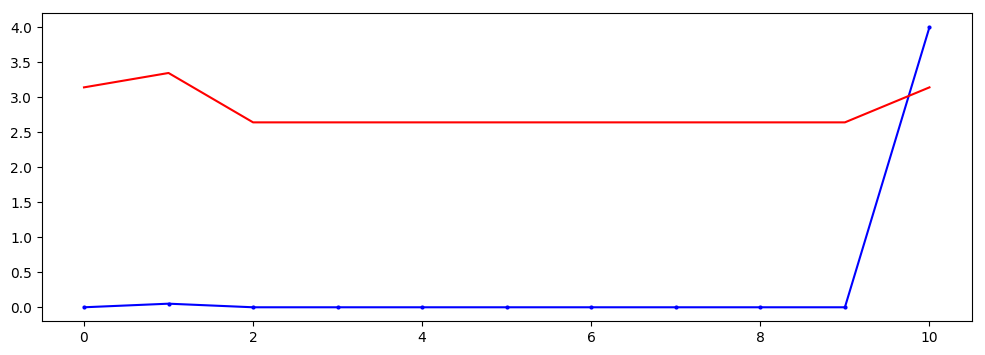

Academic license - for non-commercial use only


In [192]:

(c,x,xdot) = SolvLinearizedCartPull(x0,xf,1,.1)

using PyPlot
figure(figsize=(12,4))
# plot(c[1,:])
plot( x[1,:], "b.-", markersize=4)
plot(x[2,:],"r")



#plot( x[1,:], x[2,:], "b.-", markersize=4 )
#plot( x[1,:][T], x[2,:][T], "b.", markersize=12 )
#plot( xw[1,:], xw[2,:], "r.", markersize=12 )
#axis("equal")
#axis((1.,8.,-.5,3.5));

below, I define a library function which will convert the kinematics from a minimal set of generalized coordinates, to the maximal set that is required for my 3d ploting function:

In [97]:
"""takes a 3x3 rotation matrix and converts it to a 4x1 array of euler parameters"""
function A2P(A::Array) 
  e0 = sqrt((trace(A) + 1)/4)
  if e0 != 0
    e1 = (A[3,2] - A[2,3])/(4*e0)
    e2 = (A[1,3] - A[3,1])/(4*e0)
    e3 = (A[2,1] - A[1,2])/(4*e0)
  end

  if e0 == 0  #implies Χ = π
    #figure out which e terms are non-zero
    e1flag = false; e2flag = false; e3flag = false;
    if A[1,1] + 1 != 0  e1flag = true end
    if A[2,2] + 1 != 0  e2flag = true end
    if A[3,3] + 1 != 0  e3flag = true end

    if e1flag
      e1 = sqrt((A[1,1] + 1)/2)
      e2 = (A[2,1] + A[1,2])/(4*e1)
      e3 = (A[3,1] + A[1,3])/(4*e1)
    elseif e2flag
      e2 = sqrt((A[2,2] + 1)/2)
      e1 = (A[2,1] + A[1,2])/(4*e2)
      e3 = (A[3,2] + A[2,3])/(4*e2)
    elseif e3flag
      e3 = sqrt((A[3,3] + 1)/2)
      e1 = (A[3,1] + A[1,3])/(4*e3)
      e2 = (A[3,2] + A[2,3])/(4*e3)
    else
      warn("something is wrong with A value  $A ")
    end
  end

  p = [e0 e1 e2 e3]'
end

#principle rotations
Rx(Θ) = [1 0 0 ; 0 cos(Θ) -sin(Θ) ; 0 sin(Θ) cos(Θ)]
Ry(Θ) = [ cos(Θ) 0 sin(Θ) ; 0 1 0 ; -sin(Θ) 0 cos(Θ)]
Rz(Θ) = [ cos(Θ) -sin(Θ) 0 ; sin(Θ) cos(Θ) 0  ; 0 0 1]


Rz (generic function with 1 method)

In [130]:
using DataFrames
"""
convert state vector x for the cart pull problem from a minimal set of generalized coordinates to a
maximal set of cartesian coordinates using euler parameters to describe rotation. additionally, 
rotations will be made so that things look right in unity

inputs:
    x - state vector resulting from from our control optimization
    fln - string of file location
outputs:
    csv - write a csv to the proper location
    
assumptions:
-This code assumes the original simulation is resampled at 30Hz so the visualization timing is correct
- left handed coordinates as defined in unity:
    * y is up
    * x is left
    * z is out of the page

movement of the cart occures along the x, and rotation of the pendulum occures about z axis
"""
function process2CSV(x,path = "./pullCartVis3D/Assets/Data/data.csv")
    
    #extract state, we only need q1 and q2
    x = x[1:2,:]
    
    #build out fill state matrix  xFull = [r₁;r₂;p₁;p₂]
    nb = 2;
    xFull = zeros(7*nb, size(x)[2])  
    
    #place location parameters appropriately
    xFull[1,:] = x[1,:]
    xFull[4,:] = x[1,:]
    xFull[6,:] = .15*ones(size(x)[2],1)                 #unity compensation
    
    #place orientation parameters appropriately
    for i in range(1,size(x)[2])  
        xFull[7:10,i]   = A2P(Rx(pi/2)*eye(3))          #unity compensation
        xFull[11:14,i] = A2P(Rx(pi/2)*Ry(x[2,i]))       #unity compensation
    end
        
    #print to CSV
    xFull = convert(DataFrame, xFull)
    writetable(path,xFull)
end
    

#future:
"""
upsample or downsample 
"""
function resamplex(x,freq = 100);
    
    


process2CSV

In [131]:
process2CSV(x)

notes:

**what we have working:**
* a forward euler based solver with highly linearized dynamics, that is capable of solving 
    - optimal control of a non-inverted pendulum
    - optimal control of a swing up problem. 
    
* a unity visualizer that will display any movement of the pendulum, when given an input vector x


**Things we still need to do:**
- a proper introduction to for all these sections...
- this includes a proper derivation of the dynamics of the cart pull system
- explore what happens if we put simple path constraints on the existing system
- implement full direct collocation (with backwards euler / trapozoid method) 

**our modeling framework: levels of complexity and assumptions - each assumption removes a level of complexity in the dynamics**    
1. assumptions - small angles and quazi-static
   model - quadratic objective with Linear constraints (this is what we have working)
2. assumptions - small angles
   model - quadratic objective with quadratic constraints(to be implemented) - should solve with gurobi
3. no assumptions - full dynamics 
   model - quadratic objective with non-linear constraints - NLP - requires IPOPT library to solve


**order of integration method**
0. zero order
1. 1st order (trapezoid)
2. 2nd order or higher (math gets pretty intense)


**Implement a numerical solver to solve the system as an IVP** - I think that using a numerical solver to take the u(t) calculated by the method and then forward integrating it with the Real dynamics would be an interesting way to assess how bad each of the assumptions actually impacts the performance of this simple system. 
        
        
        
**Things we could do:**
    *explore simpsons-hermite transcription (higher order method than trapozoid)
    *explore the effect of ZOH, since this is what is actually possible as a control signal
    *explore exotic path constraints (swing up, but avoid these obsticles while you go through
    *alternative objective, robust control

    

**proposed organization of report:**

* Introduction
```julia
for model in increasing complexity```
    * Mathematical Model
    * Solution
    * Results / discussion
```julia
end```
* Conclusion
